### Fraction Improved under EADAM (across n for various k)

Here we look at what fraction of people improved under EADAM for various n, k. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [3]:
from multi_funcs_2 import *

In [4]:
ns = [int(np.round(1.5**i)) for i in range(12, 24)]
ks = [3,4,5,6,7,8]

In [5]:
for k in ks:
    for n in ns:
        results = f_simulate_all(100, n, k)
        df = make_df_all(n, k, results, save = True)

## Graphing

In [18]:
def get_data():
    df = pd.DataFrame()

    for n in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
        for k in [3,4, 5, 6, 7, 8]:
            df = pd.concat([df, pd.read_csv('data/simulations/fraction_improved_eadam/eadam_over_nn_{}_k_{}_max_diff_eadam.csv'.format(n,k))])
            df['fraction_improved'] = df['n_changes_eadam']/(2*df['n_matches'])
    return df


In [19]:
def get_data2():
    df = pd.DataFrame()

    for n in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]:
        for k in [3,4, 5, 6, 7, 8]:
            df = pd.concat([df, pd.read_csv('data/simulations/fraction_improved_eadam/eadam_over_nn_{}_k_{}_max_diff.csv'.format(n,k))])
            df['fraction_improved'] = df['n_changes']/df['n_matches']
    return df

In [20]:
df_eadam = get_data()
df_mm = get_data2()

<Axes: xlabel='n', ylabel='fraction_improved'>

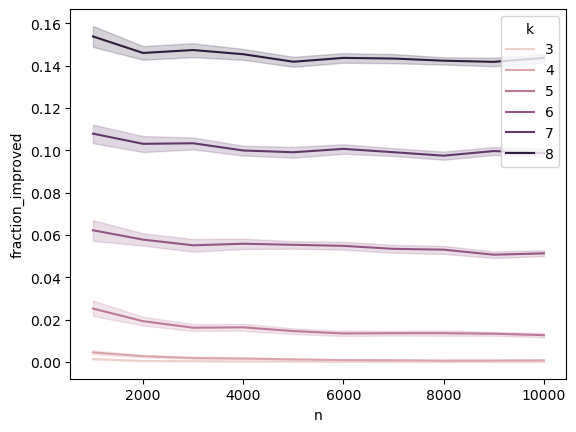

In [21]:
sns.lineplot(x='n', y='fraction_improved', hue='k', data=get_data())

<Axes: xlabel='n', ylabel='fraction_improved'>

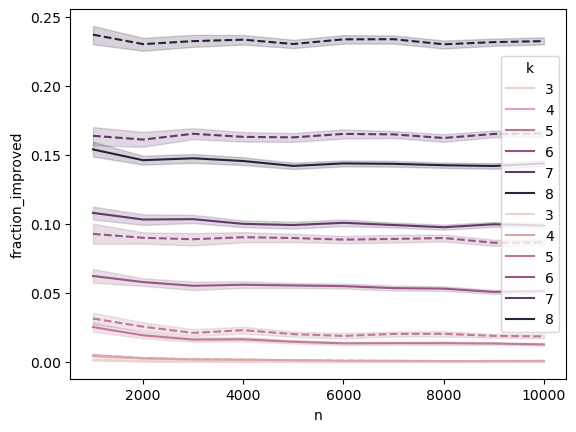

In [22]:
fig, ax = plt.subplots(1,1)

sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_eadam, ax=ax)
sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_mm, ax=ax, linestyle='--')

In [28]:
np.round([1.5**i for i in range(12, 24)])

array([  130.,   195.,   292.,   438.,   657.,   985.,  1478.,  2217.,
        3325.,  4988.,  7482., 11223.])

### Graphing New

In [6]:
ns = [int(np.round(1.5**i)) for i in range(12, 24)]
ks = [3,4,5,6,7,8]

In [7]:
def get_data():
    df = pd.DataFrame()

    for n in ns:
        for k in ks:
            df = pd.concat([df, pd.read_csv('data/simulations/new_scale/n_{}_k_{}_max_diff_eadam.csv'.format(n,k))])
    df['fraction_improved'] = df['n_changes_eadam']/(2*df['n_matches'])
    return df

In [8]:
def get_data2():
    df = pd.DataFrame()

    for n in ns:
        for k in [3,4, 5, 6, 7, 8]:
            df = pd.concat([df, pd.read_csv('data/simulations/new_scale/n_{}_k_{}_max_diff.csv'.format(n,k))])
    df['fraction_improved'] = df['n_changes']/df['n_matches']
    return df

In [9]:
def get_data3():
    df = pd.DataFrame()

    for n in ns:
        for k in [3,4, 5, 6, 7, 8]:
            df1 = pd.read_csv('data/simulations/new_scale/n_{}_k_{}_max_diff.csv'.format(n,k))
            df = pd.read_csv('data/simulations/new_scale/n_{}_k_{}_scc.csv'.format(n,k))
            df['n_matches'] = df1['n_matches']
            df = pd.concat([df, pd.read_csv('data/simulations/new_scale/n_{}_k_{}_scc.csv'.format(n,k))])
    df['fraction_improved'] = df['n_changes']/df['n_matches']
    return df

In [11]:
df_eadam = get_data()
df_mm = get_data2()
df_scc = get_data3()

FileNotFoundError: [Errno 2] No such file or directory: 'data/simulations/new_scale/n_130_k_3_scc.csv'

NameError: name 'df_eadam' is not defined

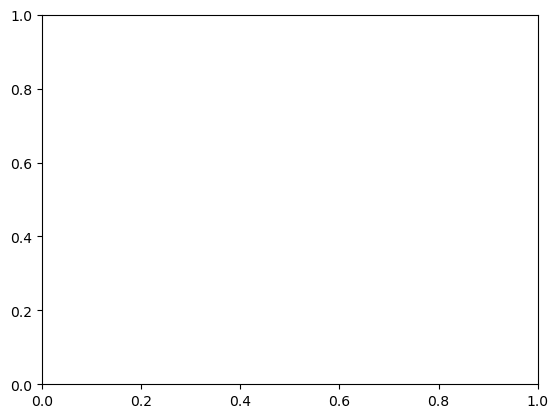

In [10]:
fig, ax = plt.subplots(1,1)

sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_eadam, ax=ax)
sns.lineplot(x='n', y='fraction_improved', hue='k', data=df_mm, ax=ax, linestyle='--')